In [ ]:
import pandas as pd
import numpy as np      #importing important libraries
import random
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer (1).csv


In [ ]:
import matplotlib.pyplot as plt
import io
from sklearn import preprocessing
df = pd.read_csv('cancer.csv') #reading the data set
print(df.head())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


In [ ]:

df= df.drop(columns=['id', 'diagnosis','Unnamed: 32'])
df=preprocessing.scale(df) 
data = (np.array(df)).reshape(-1,30)
# data=(np.array(df)).reshape(-1,30)

In [ ]:
#Euclidean function
def dist(x, y):
    return float((sum((x-y)**2))**0.5)

In [ ]:
#Finds Neighbourhood points
def neighbr_pts(data, pointid, eps):
    nbrpts = []
    for i in range(len(data)):
        if dist(data[i], data[pointid]) <= eps:
            nbrpts.append(data[i])
    
    return nbrpts

In [ ]:
neighbr_pts(data, 100, 0.0001)

[array([-0.1469182 ,  1.32418299, -0.16142577, -0.20531322, -0.10534487,
        -0.3644556 , -0.03200659, -0.10392772, -0.73974915, -0.57946123,
         0.18525333,  0.13271304, -0.00250447,  0.06166905, -0.38967544,
        -0.5923251 , -0.17983429, -0.30416536, -0.71343072, -0.54464557,
         0.1492672 ,  1.56212414,  0.0398769 ,  0.0455596 , -0.25725505,
        -0.38146146,  0.21450455,  0.05776631, -0.40404995, -0.55281807])]

In [ ]:
#Finds the Core points and labels the non-core points as others
def core_pt(data, Minpts, eps):
    c_pts = []
    other_pts = []
    for i in range(len(data)):
        if len(np.array(neighbr_pts(data, i, eps)).reshape(-1,30)) >= Minpts:
            c_pts.append(data[i])
        else:
            other_pts.append(data[i])
    c_pts = (np.array(c_pts)).reshape(-1,30)
    other_pts = (np.array(other_pts)).reshape(-1,30)
  
    return c_pts, other_pts

In [ ]:
#Finds border and Noise points
def border_noise(data, Minpts, eps):
    x, y = core_pt(data, Minpts, eps)
    
    border_pt = []
    noise_pt = []
    for i in range(len(y)):
        for j in range(len(x)):
            if dist(y[i], x[j]) <= eps:
                border_pt.append(y[i])
                break
    border_pt = np.array(border_pt).reshape(-1,30)

    for i in range(len(y)):
           if y[i] not in border_pt:
                noise_pt.append(y[i])
    noise_pt = np.array(noise_pt).reshape(-1,30)
    return border_pt,noise_pt

In [ ]:
#DBScan Algorithm
#List of Colors for the clusters
clr = ['blue','cyan','magenta', 'orange', 'red', 'yellow', 'green', 'brown', 'purple','olive','lime']

def dbscan(data, Minpts, eps):
    df = data
    s_index = []
    length = []
    z = 0
    all_cluster = []
    for k in range(len(df)):
      #Selecting random point from data-set
      point = int(np.array(random.sample(range(0, len(df)), 1)))
      point_value = []
      point_value.append(df[point])
      #Core points
      x1, y1 = core_pt(df, Minpts, eps)  
      neighbour_pts = []
      
      if point_value in x1:
        neighbour_pts=neighbr_pts(df, point, eps)
        for i in range(0,len(neighbour_pts)):
          #Density Reachable Points
          neighbour_pts = neighbour_pts + neighbr_pts(df,i, eps) 
      else:
        break 
      cl = point_value + neighbour_pts
      all_cluster = all_cluster + cl   #forming the clusters.
      length.append(len(cl))
      s_index.append(z)
      z = z + len(cl)
      cl = (np.array(cl)).reshape(-1,30)
      plt.figure() 
      #Plotting                       
      plt.scatter(data[:,0],data[:,1], color = "orange")
      k = 0
      for b in range(0, len(s_index)):
        plt.scatter(np.array(all_cluster)[s_index[b]: s_index[b]+length[b],0], np.array(all_cluster)[s_index[b]:s_index[b]+length[b],1], color = clr[k])
        k = k+1
      plt.xlabel('radius_mean')
      plt.ylabel('texture_mean')
      plt.show()
      dlist = []
      for i in df:
        if i not in cl:
          dlist.append(i)
      df = (np.array(dlist)).reshape(-1,30)

In [ ]:
#No Cluster Formed as Eps is too small
dbscan(data, 6, 0.2) 

In [ ]:
#No Cluster Formed as Eps is too small
dbscan(data, 6, 0.5) 

In [ ]:
#No Cluster Formed as Eps is too small
dbscan(data, 6, 0.2) 

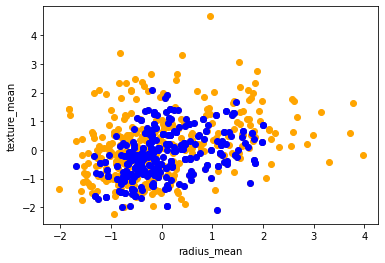

In [ ]:
#For larger value of eps, clusters are getting formed
dbscan(data, 6, 2.8)